# TP Marche aléatoire

On se propose d’étudier un phénomène de marche aléatoire sur une
droite : un objet se trouve initialement à l’emplacement 0 et, à chaque
étape, il a une chance sur deux d’avancer d’une unité et une chance sur
deux de reculer d’une unité (la droite est supposée infinie dans les deux
directions). On notera Xn la position à l’étape n et on prendra comme po-
sition initiale X0 = 0. Une trajectoire avec 10 étapes est par exemple :
(x0, x1, · · · , x10) = (0, −1, −2, −1, 0, 1, 2, 3, 4, 3, 4)

### 1. 
Ecrire une commande Python permettant d’obtenir le nombre 1 ou le
nombre -1 avec la même probabilité 1/2 (on pourra utiliser les fonctions
du module random de numpy).

In [4]:
import numpy as np

def random_proba():
    rand = np.random.randint(2)
    return -1 if rand == 0 else 1

### 2.
Écrire une fonction prenant comme argument un entier n et simulant n
pas de marche aléatoire puis affichant la position finale. Modifier le pro-
gramme pour qu’il affiche la liste de toutes les positions intermédiaires
et les représente graphiquement (en utilisant par exemple le module
matplotlib). Vous afficherez en abscisse le numéro de l’étape et en or-
donnée la position de l’objet à cette étape. Tester votre programme
avec différentes valeurs de n (10<sup>2</sup>, 10<sup>3</sup>, 10<sup>4</sup>, 10<sup>5</sup>, ...).

Valeur de n = 100
Position finale :  -12


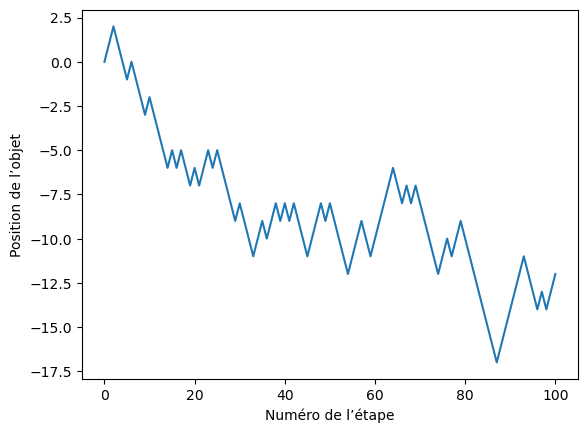

Valeur de n = 1000
Position finale :  2


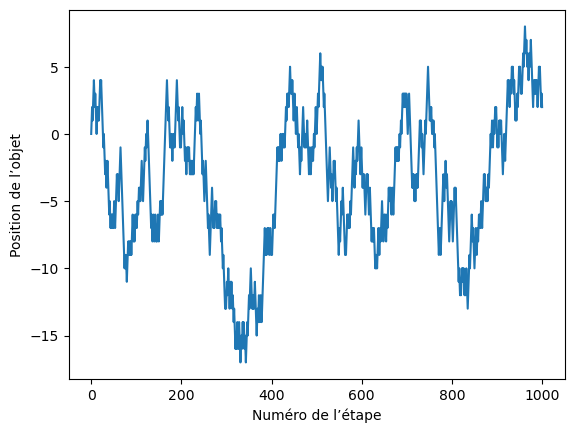

Valeur de n = 10000
Position finale :  24


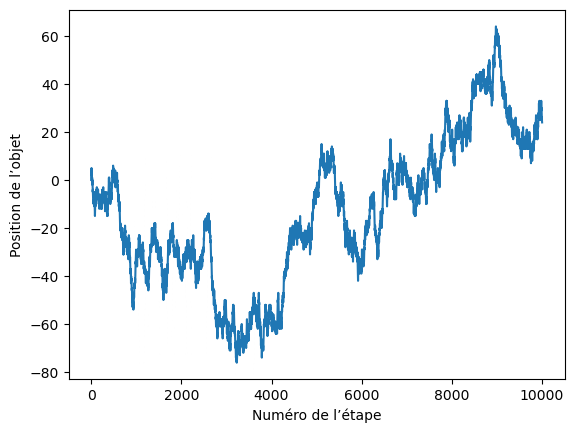

Valeur de n = 100000
Position finale :  -510


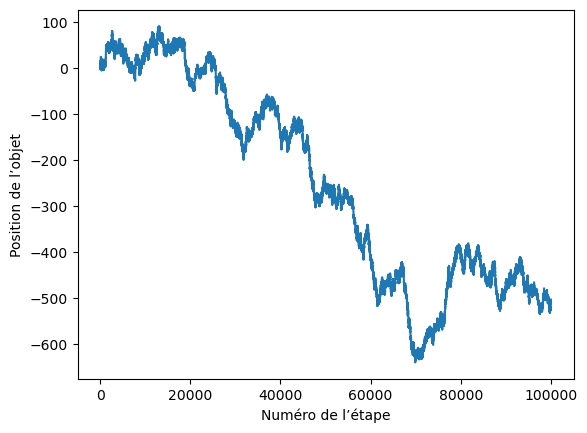

Valeur de n = 1000000
Position finale :  252


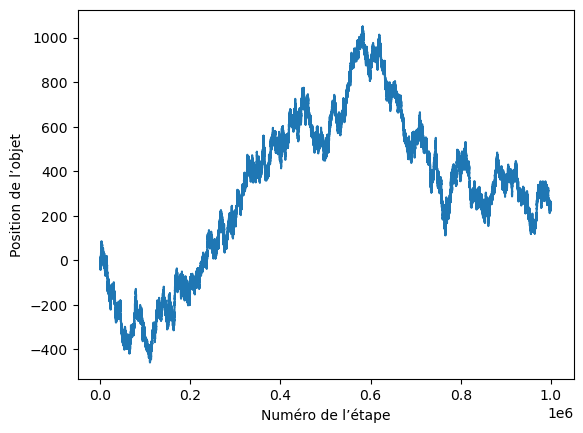

In [2]:
import matplotlib.pyplot as plt

def marche_alea(n):
    pos_inter = [0]
    pos_finale = 0
    for i in range(n):
        pos_finale += random_proba()
        pos_inter.append(pos_finale)
        
    print("Position finale : ", pos_finale)
    
    plt.plot(pos_inter)
    plt.xlabel("Numéro de l’étape")
    plt.ylabel("Position de l’objet")
    plt.show()

for i in range(2, 7):
    n = 10**i
    print("Valeur de n =", n)
    marche_alea(n)

### 3. 
Modifier votre programme pour qu’il calcule le temps moyen de passage
entre deux visites de l’état initial. Par exemple, si la séquence des états
est la suivante : [0, −1, 0, 1, 2, 3, 2, 1, 0], les temps de passage entre 2
visites de l’état 0 sont 2 et 6, ce qui donne une moyenne de 4. Tester
pour différentes valeurs de n (10<sup>3</sup>, 10<sup>4</sup>, 10<sup>5</sup>, 10<sup>6</sup>, ...). Commenter.
Petit challenge : réaliser cette simulation avec le plus grand n possible
en moins de 1 seconde.

In [3]:
def calcul_temps_entre_2_passages(n):
    pos_inter = [0]
    pos_finale = 0
    temps_moy = 0
    temps_moy_it = 0
    
    for i in range(n):
        pos_finale += random_proba()
        pos_inter.append(pos_finale)
        if pos_finale == 0:
            temps_moy += len(pos_inter)
            temps_moy_it += 1
    if(temps_moy_it != 0):
        print("Le temps moyen de passage entre deux visites de l’état initial pour", n, " :", temps_moy/temps_moy_it)
    else:
        print("L'état initial n'a jamais été revisité.")

for i in range(2, 7):
    n = 10**i
    print("Valeur de n =", n)
    print()
    calcul_temps_entre_2_passages(n)

Valeur de n = 100

Le temps moyen de passage entre deux visites de l’état initial pour 100  : 71.0
Valeur de n = 1000

Le temps moyen de passage entre deux visites de l’état initial pour 1000  : 181.25
Valeur de n = 10000

Le temps moyen de passage entre deux visites de l’état initial pour 10000  : 3734.898832684825
Valeur de n = 100000

Le temps moyen de passage entre deux visites de l’état initial pour 100000  : 29349.0796460177
Valeur de n = 1000000

Le temps moyen de passage entre deux visites de l’état initial pour 1000000  : 6967.721649484536


### 4. 
Ecrire une fonction qui estime la probabilité que l’objet soit en position
k après n étapes, c’est-à-dire P (Xn = k), en effectuant m simulations.
Nous montrerons en TD que
P (Xn = k) =
( 1
2n
 n
k+n
2
 si k et n de même parité
0 sinon . (1)
Vérifier que vos résultats empiriques sont cohérents avec cette formule
pour plusieurs valeurs de n et k, en augmentant progressivement la
valeur de m. Commenter.

In [15]:
def estimation_proba(n, k, m):
    count = 0
    for i in range(m):
        pos_finale = 0
        for j in range(n):
            pos_finale += random_proba()
        if pos_finale == k:
            count += 1
    probability = count / m
    return probability

for j in range(10):
    n = np.random.randint(2, 50)
    k = np.random.randint(1, n)
    print(f"Pour n = {n} et k = {k}")
    for i in range(2, 5):
        result = estimation_proba(n, k, 10**i)
        print(f"P(X{n} = {k}) estimée pour m={10**i} : {result}")
    print()

Pour n = 46 et k = 21
P(X46 = 21) estimée pour m=100 : 0.0
P(X46 = 21) estimée pour m=1000 : 0.0
P(X46 = 21) estimée pour m=10000 : 0.0

Pour n = 8 et k = 5
P(X8 = 5) estimée pour m=100 : 0.0
P(X8 = 5) estimée pour m=1000 : 0.0
P(X8 = 5) estimée pour m=10000 : 0.0

Pour n = 20 et k = 9
P(X20 = 9) estimée pour m=100 : 0.0
P(X20 = 9) estimée pour m=1000 : 0.0
P(X20 = 9) estimée pour m=10000 : 0.0

Pour n = 14 et k = 13
P(X14 = 13) estimée pour m=100 : 0.0
P(X14 = 13) estimée pour m=1000 : 0.0
P(X14 = 13) estimée pour m=10000 : 0.0

Pour n = 4 et k = 2
P(X4 = 2) estimée pour m=100 : 0.27
P(X4 = 2) estimée pour m=1000 : 0.268
P(X4 = 2) estimée pour m=10000 : 0.2497

Pour n = 20 et k = 18
P(X20 = 18) estimée pour m=100 : 0.0
P(X20 = 18) estimée pour m=1000 : 0.0
P(X20 = 18) estimée pour m=10000 : 0.0

Pour n = 35 et k = 26
P(X35 = 26) estimée pour m=100 : 0.0
P(X35 = 26) estimée pour m=1000 : 0.0
P(X35 = 26) estimée pour m=10000 : 0.0

Pour n = 28 et k = 23
P(X28 = 23) estimée pour m=100 : 

**Commentaire :** <br>
1. Plus le nombre de l'étape est petit, plus la probabilité que l'objet soit en position k est forte.
2. De plus, plus le nombre de simation est grande, plus la probabilité que l'objet soit en position k est amoindri.

### 5. 
Une autre méthode, pour calculer les probabilités en régime transitoire
de manière exacte, est d’utiliser la relation de récurrence suivante, vue
en cours :
P (Xn = k) = X
i
pikP (Xn−1 = i).
Utiliser cette relation, dans le cadre d’une marche aléatoire 1D, pour
écrire une fonction prenant en entrée k et n et retournant P (Xn = k).
Vérifier que vos résultats sont cohérents avec la formule (1).

In [26]:
def probabilite_recursive(k, n):
    if n == 0:
        return 1 if k == 0 else 0
    else:
        total_probability = 0
        
        for _ in range(2):  
            x = k - random_proba()
            total_probability += 0.5 * probabilite_recursive(x, n - 1)
        
        return total_probability


for j in range(10):
    n = np.random.randint(2, 30)
    k = np.random.randint(1, n)
    print(f"Pour n = {n} et k = {k}")
    for i in range(2, 5):
        result = probabilite_recursive(n, k)
        print(f"P(X{n} = {k}) estimée pour : {result}")
    print()

Pour n = 18 et k = 14
P(X18 = 14) estimée pour : 0.0
P(X18 = 14) estimée pour : 0.0
P(X18 = 14) estimée pour : 0.0

Pour n = 24 et k = 2
P(X24 = 2) estimée pour : 0.0
P(X24 = 2) estimée pour : 0.0
P(X24 = 2) estimée pour : 0.0

Pour n = 20 et k = 17
P(X20 = 17) estimée pour : 0.0
P(X20 = 17) estimée pour : 0.0
P(X20 = 17) estimée pour : 0.0

Pour n = 7 et k = 1
P(X7 = 1) estimée pour : 0.0
P(X7 = 1) estimée pour : 0.0
P(X7 = 1) estimée pour : 0.0

Pour n = 13 et k = 8
P(X13 = 8) estimée pour : 0.0
P(X13 = 8) estimée pour : 0.0
P(X13 = 8) estimée pour : 0.0

Pour n = 4 et k = 1
P(X4 = 1) estimée pour : 0.0
P(X4 = 1) estimée pour : 0.0
P(X4 = 1) estimée pour : 0.0

Pour n = 5 et k = 4
P(X5 = 4) estimée pour : 0.0
P(X5 = 4) estimée pour : 0.0
P(X5 = 4) estimée pour : 0.0

Pour n = 21 et k = 17
P(X21 = 17) estimée pour : 0.0
P(X21 = 17) estimée pour : 0.0
P(X21 = 17) estimée pour : 0.0

Pour n = 3 et k = 1
P(X3 = 1) estimée pour : 0.0
P(X3 = 1) estimée pour : 0.0
P(X3 = 1) estimée pour : 0

### 6.
Reprendre la question 2 avec une marche aléatoire 2D (équiprobabilité
d’aller à gauche, à droite, en haut et en bas). On notera (Xn, Yn) la
position à la n-ième étape. Un exemple de trajectoire avec 5 étapes :
(0, 0), (0, 1), (1, 1), (2, 1), (2, 0)), (2, −1). Dans les graphiques, vous re-
présenterez uniquement les couples de points visités.

Valeur de n = 100
Position finale : (-2, -2)


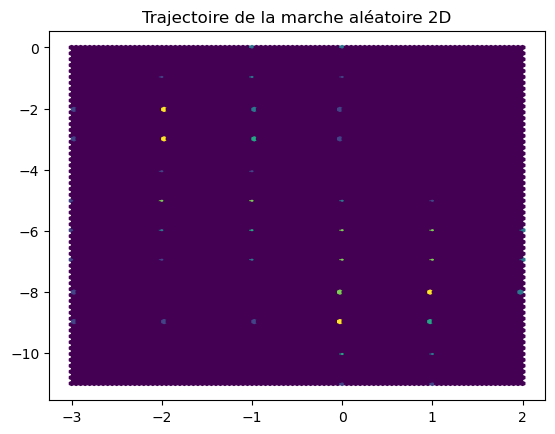

Valeur de n = 1000
Position finale : (-17, 9)


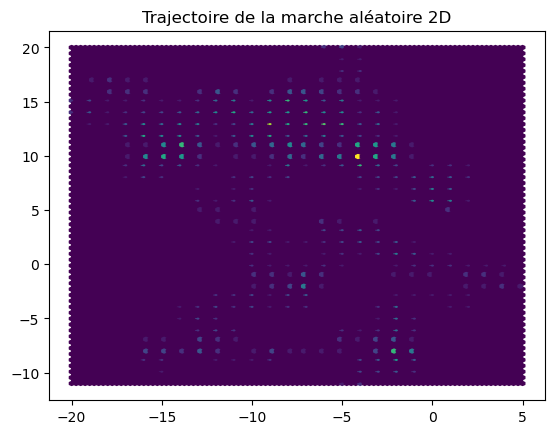

Valeur de n = 10000
Position finale : (54, -64)


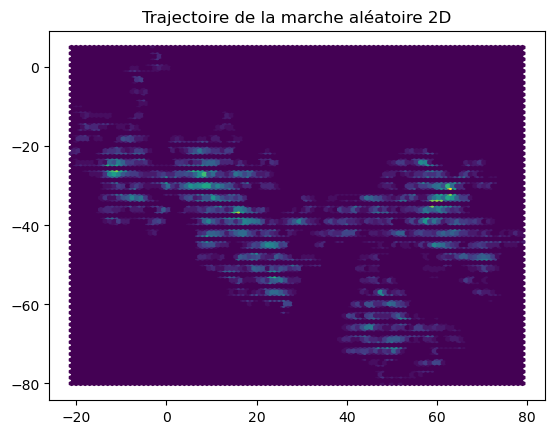

Valeur de n = 100000
Position finale : (-87, -213)


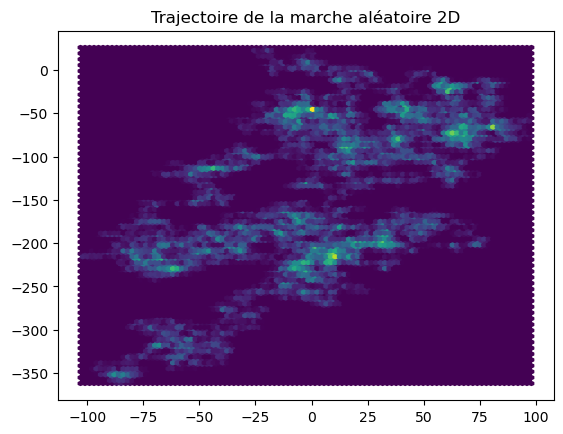

Valeur de n = 1000000
Position finale : (-273, 413)


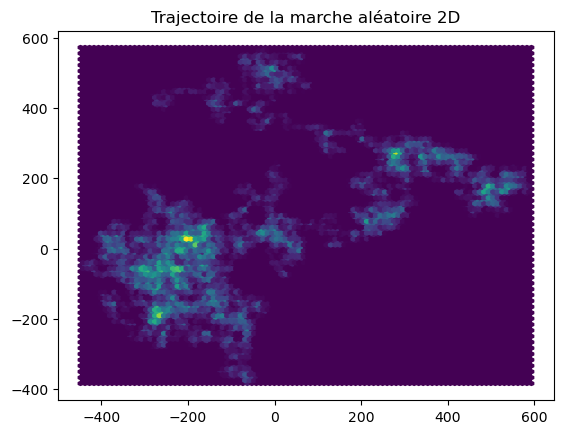

In [33]:
import random

def random_marche_2D():
    return random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])

def marche_alea_2D(n):
    x, y = 0, 0
    
    positions = [(x, y)]
    
    for _ in range(n):
        dx, dy = random_marche_2D()
        x += dx
        y += dy
        positions.append((x, y))
    
    print(f"Position finale : ({x}, {y})")
    
    x_values, y_values = zip(*positions)
    plt.hexbin(x_values, y_values)
    plt.title("Trajectoire de la marche aléatoire 2D")
    plt.show()


for i in range(2, 7):
    n = 10**i
    print("Valeur de n =", n)
    marche_alea_2D(n)